Directory Check!
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cyl

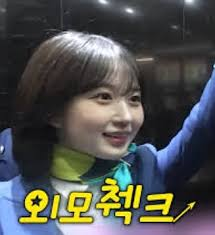

Directory Check!


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
from inho_parser import * 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
import inho_parser
from inho_parser import * 
from math import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
## ------------------------------------------------------------- ##
##              Example waf parser in warmup in FADU             ##
## ------------------------------------------------------------- ##
# ----------------------- Regular Expr. ------------------------- #
output_re=re.compile(r'.*_output')
num_re=re.compile(r'[0-9]+')
hbmw_re=re.compile(r'.*(HBMW)')
mbmw_re=re.compile(r'.*(MBMW)')
mbe_mre=re.compile(r'.*(MBE)')
mbe_re=re.compile(r'.*(MBE)')

total_bw_re=re.compile(r'.*READ: bw=')
nvme_iostat_re=re.compile(r'nvme1n1')
#write_bw_re=re.compile()
# ----------------------- Figure Expr. ------------------------- #

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
mpl.rcParams['savefig.pad_inches'] = 0
isConference=True

dev_list = []
re_dev=re.compile(r'^FADU-FDP+|^Samsung+')
#%ls './FEMU/'


def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

def get_per_ruh_waf_to_dict (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1) or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [float(1.0)]
                    else:
                        ruh_waf[ruhid].append(float(1.0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [mbmw/hbmw]
                    else:
                        ruh_waf[ruhid].append(float(mbmw/hbmw))
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return ruh_waf

def get_per_ruh_mb_to_list (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    ruh_hbmw = {}
    ruh_mbmw = {}
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1)or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [float(1.0)]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(1.0))
                        ruh_hbmw[ruhid].append(int(0))
                        ruh_mbmw[ruhid].append(int(0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [mbmw/hbmw]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(mbmw/hbmw))
                        ruh_hbmw[ruhid].append(hbmw)
                        ruh_mbmw[ruhid].append(mbmw)
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return [ruh_hbmw,ruh_mbmw]

def get_per_ruh_waf_to_list (data_dir, subdir, filename=None, verbose=None):
    # ---------------------------------------------------------------- #
    if filename is None:
        filename = "samsung_waf_1sec.txt"
    # ---------------------------------------------------------------- #
    per_ruh_waf_list = []

    for i,t in enumerate(subdir):
        per_ruh_waf_list.append(get_per_ruh_waf_to_dict(data_dir+t, filename=None))
        print(t)

    
    return per_ruh_waf_list


# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#!pip3 install IPython
import IPython
from IPython.display import Image
import os
from colorama import Fore, Style

def check_file_existence(directory, filename=None):
    if(filename == None):
        filename = "samsung_waf_1sec.txt"
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        print(f"{Fore.GREEN}[Check!]{Style.RESET_ALL} {file_path}")
        return 1
    else:
        print(f"{Fore.RED}['No such file/dir']{Style.RESET_ALL} {file_path}")
        return 0 

print("Directory Check!")

dirpath="/data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/"

ruht_dirs=[
    'II/',
    'PI/'
]

workloads = [
    'zipf_1.2/',
    'zoned/',
    '90rand_zipf1.2/',
    'sq0_90r_zipf_1.2/',
]
subdirs=[
    'fdp/',
    'nofdp/',
    'fdp_share/'
]

#filename = input("Enter the filename to check: ")
for w in workloads:
    for ruht in ruht_dirs:
        for sdir in subdirs:
            check_file_existence(dirpath+ruht+w+sdir)
#Image("/data/inho/OH1_.png") 
display(Image("/data/inho/check.png"))
print("Directory Check!")


[Check!] ./FIO-scripts/1stream/nvme0_waf_1sec.txt


./FIO-scripts/1stream/
[Check!] ./FIO-scripts/1stream/nvme0_waf_1sec.txt
hbmw_list_TB -0.004717909420530002
./archive/result-FIO/1syn-all-fig11/samsung_waf_1min.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/samsung_waf_1min.txt
hbmw_list_TB 36.138960985893696
./archive/result-FIO/1syn-all-fig11/fadu_waf_1min.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/fadu_waf_1min.txt
hbmw_list_TB 65.80848172307014
./archive/result-FIO/1syn-all-fig11/femu8_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femuXXX_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femu_lazy4_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/
[Check!] ./archive/result-FIO/1syn-all-fig11/femu_lazy4_waf_1sec.txt
hbmw_list_TB 31.038759231567383
./archive/result-FIO/1syn-all-fig11/femu_lazy8_waf_1sec.txt
./archive/result-FIO/1syn-all-fig11/femu256_lazy05_.txt
./archive/result-FIO/1syn-all-fig11/femu448_lazy05_.txt
./archive/result-FIO/1syn-all-fig

/tmp/ipykernel_2332356/3158559548.py:376: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


hbmw_list_TB 28.61300250462123


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


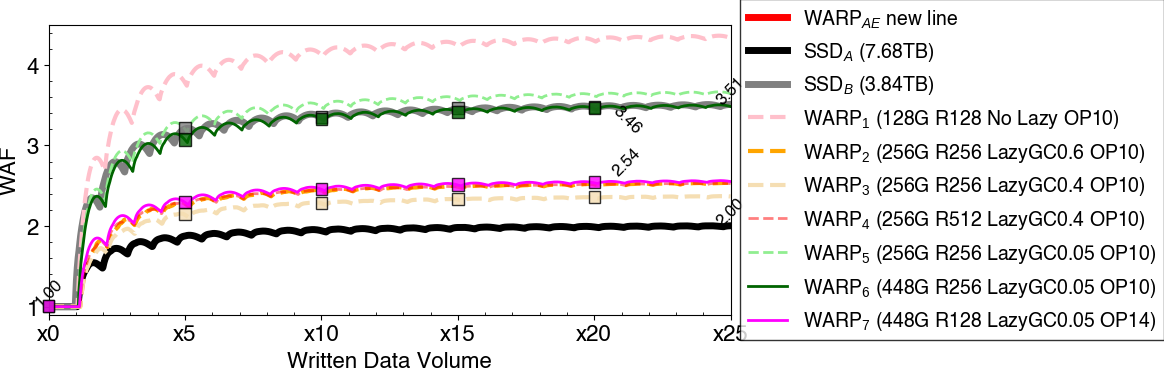

In [3]:
#------------------------------------------------------------#
fig, ax = plt.subplots(1,1, figsize=(12,4))
#------------------------------------------------------------#
ax2=ax
x_cut_lim = 25
hop=5
TEXT_FONT_SIZE = SMALL_SIZE
def x_cut_limit(hbmw_list_TB, waf_list, x_cut_lim=None):
    if x_cut_lim ==None:
        x_cut_lim = 25

    lim=len(hbmw_list_TB)
    for k, hb in enumerate(hbmw_list_TB):
        if hb >= x_cut_lim:
            lim = k
            break
    hbmw_list_TB = hbmw_list_TB[:lim]
    waf_list = waf_list[:lim]

    return [hbmw_list_TB,waf_list]


#------------------------------------------------------------#
waf_list_label = [r'WARP$_{AE}$ new line']
waf_list_color = ['red']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./FIO-scripts/1stream/" 
    filename="nvme0_waf_1sec.txt"
    path = data_dir
    
    if (check_file_existence(path, filename) == 0):
        break
        
    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 7.68 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 7.68, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.4, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
    v = waf_list[-1]
    j = hbmw_list_TB[-1]
    ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)

#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r'SSD$_{A}$ (7.68TB)']
waf_list_color = ['black']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="samsung_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 7.68 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 7.68, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.4, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=-45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)

#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r'SSD$_{B}$ (3.84TB)']
waf_list_color = ['gray']
waf_list_bar = []
hop=5
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="fadu_waf_1min.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_TB = [ x / 3.84 for x in hbmw_list ]
    ret = x_cut_limit(hbmw_list_TB,waf_list,x_cut_lim)
    hbmw_list_TB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
    ax2.plot( hbmw_list_TB, waf_list, linewidth=5, color=waf_list_color[i], label= waf_list_label[i])
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 3.84, filename,x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v+0.2, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))

v = waf_list[-1]
j = hbmw_list_TB[-1]
ax2.text(j, v+0.001, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE, rotation=45)
#------------------------------------------------------------#

#-----------------------BEGIN-----------------------------#
waf_list_label = [r"WARP$_{1}$ (128G R128 No Lazy OP10)"]
waf_list_color = ['pink']
waf_list_bar = []

#--------------------- FIGURE ----------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu8_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/128 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
 
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--', color=waf_list_color[i], label= waf_list_label[i])


#--------------------------FIN---------------------------#

#-----------------------BEGIN-----------------------------#
waf_list_label = [r"WARP$_{2}$ (256G R256 LazyGC0.6 OP10)"]
waf_list_color = ['orange']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femuXXX_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#
    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--', color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    #------------------------------------------------------------#
    # hop=5
    # a=0.6
    # my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 256/1024, filename, x_cut_lim)
    # for j, v in enumerate(my_waf_text_index[::hop]):
    #         if j> 0:
    #             ax2.text(j*hop+1.2, v+0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
    #             ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor='red', alpha=0.8))
#------------------------------------------------------------#


#------------------------------------------------------------#
waf_list_label = [r"WARP$_{3}$ (256G R256 LazyGC0.4 OP10)"]
waf_list_color = ['wheat']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu_lazy4_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=3 , linestyle='--' ,color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    #------------------------------------------------------------#
    hop=5
    a=0.6
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 256/1024, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
            if j> 0:
                #ax2.text(j*hop+1.2, v-0.02, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))

#------------------------------------------------------------#
waf_list_label = [r"WARP$_{4}$ (256G R512 LazyGC0.4 OP10)"]
waf_list_color = ['red']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    filename="femu_lazy8_waf_1sec.txt"
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='--',color=waf_list_color[i], label= waf_list_label[i] , alpha=0.5)
#------------------------------------------------------------#

#------------------------------------------------------------#
#waf_list_label = ["cylon (256G RU256MB LazyGC 0.25 OP10)", "cylon (256G RU256MB LazyGC 0.05 OP10)" ]
#waf_list_color = ['lightgreen', 'b']
waf_list_label = [r"WARP$_{5}$ (256G R256 LazyGC0.05 OP10)"]
waf_list_color = ['lightgreen', 'lightgreen']
filenames = [ "femu256_lazy05_.txt"]
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    #filename="femu256_lazy05_4.txt"
    filename = filenames[i]
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/256 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='--',color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
#------------------------------------------------------------#

#------------------------------------------------------------#
#waf_list_label = ["cylon (256G RU256MB LazyGC 0.25 OP10)", "cylon (256G RU256MB LazyGC 0.05 OP10)" ]
#waf_list_color = ['lightgreen', 'b']
waf_list_label = [r"WARP$_{6}$ (448G R256 LazyGC0.05 OP10)", r"WARP$_{7}$ (448G R128 LazyGC0.05 OP14)"]
waf_list_color = ['darkgreen', 'magenta']
filenames = [ 'femu448_lazy05_.txt', 'femu448_lazy05_128M.txt']
waf_list_bar = []
#------------------------------------------------------------#
for i, t in enumerate(waf_list_label):
    data_dir = "./archive/result-FIO/1syn-all-fig11/" 
    #filename="femu256_lazy05_4.txt"
    filename = filenames[i]
    print (data_dir+filename)

    info_list = waf_log_to_waf_lists(data_dir,filename)

    waf_list = info_list[0]
    hbmw_list = info_list[1] 
    mbmw_list= info_list[2] 
    erase_list= info_list[3] 
    #------------------------------------------------------------#
    hbmw_list_GB = [ (x*1024)/448 for x in hbmw_list]
    ret = x_cut_limit(hbmw_list_GB,waf_list,x_cut_lim)
    hbmw_list_GB = ret[0]
    waf_list = ret[1]
    #------------------------------------------------------------#

    #ax1.plot( range(0, len(mbmw_list[1:])) , mbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='black', label='Dev')
    # ax1.plot( range(0, len(erase_list[1:])) , erase_list[1:] , linewidth=4, marker='x', markersize=1, color='gray', label='erase', alpha=0.5)
    #ax1.plot( range(0, len(hbmw_list[1:])) , hbmw_list[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    #ax1.plot( range(0, len(hbmw_list_GB[1:])) , hbmw_list_GB[1:] , linewidth=1, marker='x', markersize=1, color='orange', label='Host')
    ax2.plot(hbmw_list_GB, waf_list, linewidth=2 , linestyle='-',color=waf_list_color[i], label= waf_list_label[i])
    #ax2.plot( range(0, len(waf_list)), waf_list, linewidth=0.1, marker='o', markersize=1 ,color=waf_list_color[i], label= waf_list_label[i])
    # for j, v in enumerate(waf_list[::100]):
    #     ax1.text(j*100, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    # for j, v in enumerate(waf_list[::1000]):
    #     ax2.text(j*1000, v+0.001, "%.2f" %v, ha="center", fontsize=BIGGER_SIZE, rotation=45)
    my_waf_text_index = get_waf_by_aligned_hbmw(data_dir, 448/1024, filename, x_cut_lim)
    for j, v in enumerate(my_waf_text_index[::hop]):
        rota=45
        a = 0.1
        if i == 0:
            rota= -45
            a = -3*a
        if j> 3:
            ax2.text(j*hop+1.2, v+a, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE , rotation=rota)
        ax2.text(j*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=waf_list_color[i], alpha=0.8))
#------------------------------------------------------------#
ax2=ax
#ax.set_title("4K randwrite (uniform)", fontsize=MEDIUM_SIZE)
#fig.text(0.3, +0.05, r'X-axis : $\mathrm{Relative HMW} = \frac{\mathrm{Host\ Media\ Written}}{ Dev. Capacity}$', fontsize=BIGGER_SIZE)
ax2.set_xlabel(r'Written Data Volume', fontsize=MEDIUM_SIZE , fontproperties=helvetica_prop)
ax2.set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
ax2.set_xlim([0,25])
#ax2.grid()
#ax2.legend()
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=False, edgecolor='k' ,frameon=True, fontsize=MEDIUM_SIZE-2)
#plt.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
ax.minorticks_on()
ax.set_ylim(0.9,4.5)
#------------------------------------------------------------#
labels = [label.get_text() for label in ax2.get_xticklabels()]
ax2.set_xticklabels([f"x{t}" for t in labels] , fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
for label in ax2.get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)

#------------------------------------------------------------#
fig.tight_layout()

# ------------------- #
isConference=True
if (isConference) :
    save_dir = "./"
    fig_name = "val-1stream-AE"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name)  ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name) ) #, dpi=100)
# ------------------- #

